# IMPORTS
All the imports necessary for this project.


In [ ]:
import io
import pandas as pd
from google.colab import files

# Locally Load Data

The goal here is to load the data locally, so we can manipulate the data before 
having it in a database

In [ ]:
uploaded = files.upload()

Saving raw_credits.csv to raw_credits.csv
Saving raw_titles.csv to raw_titles.csv
Saving imdb.csv to imdb.csv


In [ ]:
orig_rawT = pd.read_csv(io.StringIO(uploaded['raw_titles.csv'].\
                                    decode('utf-8')))
orig_rawC = pd.read_csv(io.StringIO(uploaded['raw_credits.csv'].\
                                    decode('utf-8')))
orig_imdb = pd.read_csv(io.StringIO(uploaded['imdb.csv'].decode('utf-8')))

# Observe Data

Have a first glance of what we will be dealling with.

In [ ]:
orig_rawT.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [ ]:
orig_rawC.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [ ]:
orig_imdb.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",8.3,46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",125.0
2,2,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,54.0
3,3,The Rise and Fall of El Chapo,2016.0,tv movie,['Documentary'],6.9,42.0,['United States'],NaN,NaN,NaN,NaN,NaN,85.0
4,4,Sick - IMDb,NaN,NaN,['Thriller'],NaN,NaN,['United States'],NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",NaN


# Clean Data
### Staring With imdb data


In [ ]:
#Keeping the column wanted
imdb = orig_imdb[["title","kind","year","rating","vote",'genre',\
                  'runtime','cast','director']]
imdb.shape

(9826, 9)

In [ ]:
imdb

,title,kind,year,rating,vote,genre,runtime,cast,director
0,Dinosaur Planet,tv mini series,2003.0,7.7,474.0,"['Documentary', 'Animation', 'Family']",50.0,"['Christian Slater', 'Scott Sampson']",NaN
1,Character,movie,2021.0,8.3,46.0,"['Crime', 'Horror', 'Thriller']",125.0,"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai']
2,Get Up and Dance!,video movie,1994.0,8.1,18.0,['Family'],54.0,"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell']
3,The Rise and Fall of El Chapo,tv movie,2016.0,6.9,42.0,['Documentary'],85.0,NaN,NaN
4,Sick - IMDb,NaN,NaN,NaN,NaN,['Thriller'],NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams']
...,...,...,...,...,...,...,...,...,...
9821,All Monsters Attack,movie,1969.0,3.9,4384.0,"['Adventure', 'Family', 'Fantasy']",69.0,"['Tomonori Yazaki', 'Hideyo Amamoto', 'Sachio ...","['Ishirô Honda', 'Jun Fukuda', 'Kengo Furusawa']"
9822,Fidel Castro,episode,2005.0,6.4,44.0,"['Documentary', 'Biography', 'History']",NaN,"['Rena Baskin', 'Fulgencio Batista', 'James Bl...","['Adriana Bosch', 'M Pink Christofalo']"
9823,Epoch,tv movie,2001.0,4.9,2376.0,"['Sci-Fi', 'Thriller']",96.0,"['David Keith', 'Stephanie Niznik', ""Ryan O'Ne...",['Matt Codd']
9824,The Company,movie,2003.0,6.3,6501.0,"['Drama', 'Music', 'Romance']",112.0,"['Neve Campbell', 'Malcolm McDowell', 'James F...",['Robert Altman']


In [ ]:
imdb = imdb.sort_values(by=['title','year','rating','vote'])
imdb

,title,kind,year,rating,vote,genre,runtime,cast,director
2954,"""Curb Your Enthusiasm"" Season 10 Highlights",episode,2020.0,7.2,17.0,"['Short', 'News']",NaN,NaN,NaN
2979,"""The Fosters"" Season 5 Set Visit",episode,2017.0,NaN,NaN,"['Short', 'News', 'Talk-Show']",NaN,"['Hayden Byerly', 'Noah Centineo', 'Corinne He...",['JD Piché']
1933,$ellebrity: The Go-To Girls - A Special Editio...,episode,2020.0,NaN,NaN,"['Documentary', 'News']",NaN,"['David Muir', 'Amy Robach', 'Paris Hilton', '...",NaN
6343,$ellebrity: The Go-To Girls - A Special Editio...,episode,2020.0,NaN,NaN,"['Documentary', 'News']",NaN,"['David Muir', 'Amy Robach', 'Paris Hilton', '...",NaN
2060,'Angel': Season 4 Overview,video movie,2004.0,6.7,86.0,['Documentary'],NaN,"['Amy Acker', 'Jeffrey Bell', 'David Boreanaz'...",NaN
...,...,...,...,...,...,...,...,...,...
1409,s-CRY-ed,tv series,2001.0,7.0,1105.0,"['Animation', 'Action', 'Adventure', 'Fantasy'...",629.0,"['Steve Blum', 'Carrie Savage', 'Jason Spisak'...",NaN
2888,xXx: State of the Union,movie,2005.0,4.5,69030.0,"['Action', 'Adventure', 'Crime', 'Sci-Fi', 'Th...",101.0,"['Willem Dafoe', 'Samuel L. Jackson', 'Ice Cub...",['Lee Tamahori']
5763,¡Vampiros en La Habana!,movie,1985.0,7.0,1322.0,"['Animation', 'Comedy', 'Horror', 'Romance']",69.0,"['Frank González', 'Manuel Marín', 'Irela Brav...",['Juan Padrón']
8442,À Nous la Liberté,movie,1931.0,7.5,4333.0,"['Comedy', 'Musical']",104.0,"['Henri Marchand', 'Raymond Cordy', 'Rolla Fra...",['René Clair']


In [ ]:
imdb.title = imdb.title.str.strip()
imdb = imdb.dropna(subset=["title","kind","year","rating","vote",'genre'\
                           ,'runtime'])
imdb.shape

(8419, 9)

In [ ]:
#Drop movie or serie only if they have the same name and year. Since a movie have
#remakes so same title but different year
imdb = imdb.drop_duplicates(['title','year'], keep = 'last')
imdb.shape

(8032, 9)

In [ ]:
imdb[imdb.title == "Cinderella"]

,title,kind,year,rating,vote,genre,runtime,cast,director
2513,Cinderella,episode,1985.0,7.7,213.0,"['Adventure', 'Comedy', 'Family', 'Fantasy']",54.0,"['Jennifer Beals', 'Matthew Broderick', 'Jean ...",['Mark Cullingham']
8694,Cinderella,movie,2021.0,4.2,28190.0,"['Adventure', 'Comedy', 'Family', 'Fantasy', '...",113.0,"['Camila Cabello', 'Nicholas Galitzine', 'Idin...",['Kay Cannon']


In [ ]:
imdb.kind.unique()

array(['video movie', 'episode', 'movie', 'tv series', 'tv mini series',
       'tv movie', 'tv short', 'video game'], dtype=object)




> Considered as **Movie**
*   movie
*   tv short
*   video movie
*   tv movie
*   episode

> Considered as **Series**
*   tv series
*   tv mini series


> Other
*   video game

In [ ]:
#video game not needed in this project
imdb = imdb[imdb["kind"] != "video game"]
imdb.shape

(8031, 9)

In [ ]:
#changing kinds to only movies or series has it will be easier to manipulate
imdb['kind'] = imdb['kind'].replace(['tv short', 'video movie', 'tv movie',\
                                     'episode'], 'movie')
imdb['kind'] = imdb['kind'].replace(['tv series', 'tv mini series']\
                                    , 'serie')
imdb.kind.unique()

array(['movie', 'serie'], dtype=object)

In [ ]:
#Rename columns reset index and change column type
columns = ['title', 'kind', 'year', 'score', 'num_votes', 'genres',
       'runtime', 'actors', 'directors']
imdb.columns = columns
imdb = imdb.astype({'year':'int','num_votes':'int','runtime':'int'})
imdb = imdb.reset_index(drop=True)
imdb

,title,kind,year,score,num_votes,genres,runtime,actors,directors
0,'Angel': Season One,movie,2003,8.4,114,"['Documentary', 'Short']",11,"['David Greenwalt', 'David Boreanaz', 'Kelly A...",NaN
1,'Manos' the Hands of Fate,movie,1993,9.1,1359,"['Comedy', 'Sci-Fi']",93,"['Trace Beaulieu', 'Joel Hodgson', 'Jim Mallon...",['Joel Hodgson']
2,'N Sync: 'N the Mix,movie,2001,7.8,21,['Documentary'],78,"['Lance Bass', 'Joey Fatone', 'Justin Timberla...",['Lorin Finkelstein']
3,'N Sync: Making the Tour,movie,2000,6.1,56,"['Documentary', 'Music']",80,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey Fa...",['Jason A. Carbone']
4,'N Sync: PopOdyssey Live,movie,2002,7.5,89,['Music'],83,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey Fa...",['Michael B. Borofsky']
...,...,...,...,...,...,...,...,...,...
8026,eXistenZ,movie,1999,6.8,96944,"['Horror', 'Sci-Fi', 'Thriller']",97,"['Jennifer Jason Leigh', 'Jude Law', 'Ian Holm...",['David Cronenberg']
8027,s-CRY-ed,serie,2001,7.0,1105,"['Animation', 'Action', 'Adventure', 'Fantasy'...",629,"['Steve Blum', 'Carrie Savage', 'Jason Spisak'...",NaN
8028,xXx: State of the Union,movie,2005,4.5,69030,"['Action', 'Adventure', 'Crime', 'Sci-Fi', 'Th...",101,"['Willem Dafoe', 'Samuel L. Jackson', 'Ice Cub...",['Lee Tamahori']
8029,¡Vampiros en La Habana!,movie,1985,7.0,1322,"['Animation', 'Comedy', 'Horror', 'Romance']",69,"['Frank González', 'Manuel Marín', 'Irela Brav...",['Juan Padrón']


In [ ]:
imdb.actors.iloc[0].strip("[]").replace("'",'').split(",")

['David Greenwalt',
 ' David Boreanaz',
 ' Kelly A. Manners',
 ' Tim Minear',
 ' Elisabeth Röhm',
 ' James A. Contner',
 ' Alexis Denisof',
 ' J. August Richards',
 ' Julie Benz',
 ' Nicholas Brendon',
 ' Charisma Carpenter',
 ' Eliza Dushku',
 ' Sarah Michelle Gellar',
 ' Seth Green',
 ' Alyson Hannigan',
 ' Christian Kane',
 ' James Marsters',
 ' Tracy Middendorf',
 ' Glenn Quinn',
 ' Stephanie Romanov']

In [ ]:
# Change actors, directors, genres from str to an actual array
imdb.actors = imdb.actors.str.strip("[]").replace(["'","\""],"").str.split(",")
imdb.directors = imdb.directors.str.strip("[]").replace(["'","\""],"").str.split(",")
imdb.genres = imdb.genres.str.strip("[]").replace(["'","\""],"").str.split(",")

In [ ]:
imdb

,title,kind,year,score,num_votes,genres,runtime,actors,directors
0,'Angel': Season One,movie,2003,8.4,114,"['Documentary', 'Short']",11,"['David Greenwalt', 'David Boreanaz', 'Kelly...",NaN
1,'Manos' the Hands of Fate,movie,1993,9.1,1359,"['Comedy', 'Sci-Fi']",93,"['Trace Beaulieu', 'Joel Hodgson', 'Jim Mall...",['Joel Hodgson']
2,'N Sync: 'N the Mix,movie,2001,7.8,21,['Documentary'],78,"['Lance Bass', 'Joey Fatone', 'Justin Timber...",['Lorin Finkelstein']
3,'N Sync: Making the Tour,movie,2000,6.1,56,"['Documentary', 'Music']",80,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Jason A. Carbone']
4,'N Sync: PopOdyssey Live,movie,2002,7.5,89,['Music'],83,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Michael B. Borofsky']
...,...,...,...,...,...,...,...,...,...
8026,eXistenZ,movie,1999,6.8,96944,"['Horror', 'Sci-Fi', 'Thriller']",97,"['Jennifer Jason Leigh', 'Jude Law', 'Ian Ho...",['David Cronenberg']
8027,s-CRY-ed,serie,2001,7.0,1105,"['Animation', 'Action', 'Adventure', 'Fanta...",629,"['Steve Blum', 'Carrie Savage', 'Jason Spisa...",NaN
8028,xXx: State of the Union,movie,2005,4.5,69030,"['Action', 'Adventure', 'Crime', 'Sci-Fi', ...",101,"['Willem Dafoe', 'Samuel L. Jackson', 'Ice C...",['Lee Tamahori']
8029,¡Vampiros en La Habana!,movie,1985,7.0,1322,"['Animation', 'Comedy', 'Horror', 'Romance']",69,"['Frank González', 'Manuel Marín', 'Irela Br...",['Juan Padrón']


### Clean raw_title and raw_credits

Simalar strategy will be applied to the other movie and cast data frame

In [ ]:
orig_rawT

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,tm1108171,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,tm1045018,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [ ]:
#Keep needed columns
titles = orig_rawT[["title",'type','release_year','imdb_score','imdb_votes','genres'\
                    ,'runtime','id']]
titles.shape

(5806, 8)

In [ ]:
#rename columns
columns = ['title', 'kind', 'year', 'score', 'num_votes', 'genres',
       'runtime', 'id']

titles.columns = columns

In [ ]:
titles = titles.sort_values(by=['title','year','score','num_votes'])
titles.title = titles.title.str.strip()
titles

,title,kind,year,score,num_votes,genres,runtime,id
2927,#ABtalks,SHOW,2018,9.6,7.0,[],68,ts265844
3288,#Alive,MOVIE,2020,6.3,37199.0,"['thriller', 'horror', 'action', 'drama']",98,tm820190
4040,#AnneFrank. Parallel Stories,MOVIE,2019,6.5,1503.0,"['drama', 'documentation', 'history']",92,tm817087
1651,#FollowFriday,MOVIE,2016,2.7,382.0,['thriller'],90,tm257629
3116,#FriendButMarried,MOVIE,2018,6.9,695.0,"['romance', 'comedy', 'drama']",102,tm371188
...,...,...,...,...,...,...,...,...
1196,幸福料理,SHOW,2014,NaN,NaN,[],44,ts271005
4715,糖糖Online,SHOW,2019,5.5,21.0,['drama'],24,ts222901
4815,마법버스 타요,SHOW,2020,NaN,NaN,[],24,ts304136
4525,캐치! 티니핑,SHOW,2020,NaN,NaN,[],12,ts314529


In [ ]:
titles = titles.dropna()
titles.shape

(5267, 8)

In [ ]:
titles = titles.drop_duplicates(['title','year'], keep = 'last')
titles.shape

(5265, 8)

In [ ]:
titles = titles.reset_index(drop=True)

In [ ]:
titles = titles.astype({'num_votes':'int'})
titles

,title,kind,year,score,num_votes,genres,runtime,id
0,#ABtalks,SHOW,2018,9.6,7,[],68,ts265844
1,#Alive,MOVIE,2020,6.3,37199,"['thriller', 'horror', 'action', 'drama']",98,tm820190
2,#AnneFrank. Parallel Stories,MOVIE,2019,6.5,1503,"['drama', 'documentation', 'history']",92,tm817087
3,#FollowFriday,MOVIE,2016,2.7,382,['thriller'],90,tm257629
4,#FriendButMarried,MOVIE,2018,6.9,695,"['romance', 'comedy', 'drama']",102,tm371188
...,...,...,...,...,...,...,...,...
5260,"tick, tick... BOOM!",MOVIE,2021,7.5,96418,['drama'],121,tm979026
5261,"¡Ay, mi madre!",MOVIE,2019,3.9,394,"['comedy', 'european']",81,tm462551
5262,Òlòtūré,MOVIE,2019,5.5,774,"['drama', 'crime']",106,tm931701
5263,Три кота,SHOW,2015,6.8,95,"['scifi', 'comedy', 'family', 'animation']",5,ts82327


In [ ]:
rawC = orig_rawC[["person_id",'id','name','role']]
rawC

,person_id,id,name,role
0,3748,tm84618,Robert De Niro,ACTOR
1,14658,tm84618,Jodie Foster,ACTOR
2,7064,tm84618,Albert Brooks,ACTOR
3,3739,tm84618,Harvey Keitel,ACTOR
4,48933,tm84618,Cybill Shepherd,ACTOR
...,...,...,...,...
77208,1347054,tm1098060,Nnenna Rachael Okonkwo,ACTOR
77209,157590,tm1098060,Lucien Morgan,ACTOR
77210,129059,tm1098060,Magdalena Korpas,ACTOR
77211,2050199,tm1098060,Mistura Olusanya,ACTOR


In [ ]:
rawC = rawC.dropna()
rawC.shape

(77213, 4)

In [ ]:
rawC.name = rawC.name.str.strip()
rawC = rawC.drop_duplicates()
rawC.role.unique()

array(['ACTOR', 'DIRECTOR'], dtype=object)

In [ ]:
# Get the two data frame from the same source together
imdb2 = pd.merge(titles,rawC, left_on='id', right_on='id', how='left')
imdb2

,title,kind,year,score,num_votes,genres,runtime,id,person_id,name,role
0,#ABtalks,SHOW,2018,9.6,7,[],68,ts265844,NaN,NaN,NaN
1,#Alive,MOVIE,2020,6.3,37199,"['thriller', 'horror', 'action', 'drama']",98,tm820190,99597.0,Yoo Ah-in,ACTOR
2,#Alive,MOVIE,2020,6.3,37199,"['thriller', 'horror', 'action', 'drama']",98,tm820190,61460.0,Park Shin-hye,ACTOR
3,#Alive,MOVIE,2020,6.3,37199,"['thriller', 'horror', 'action', 'drama']",98,tm820190,237343.0,Lee Hyun-wook,ACTOR
4,#Alive,MOVIE,2020,6.3,37199,"['thriller', 'horror', 'action', 'drama']",98,tm820190,158864.0,Jeon Bae-soo,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...
73052,糖糖Online,SHOW,2019,5.5,21,['drama'],24,ts222901,1260135.0,Suun Lin,ACTOR
73053,糖糖Online,SHOW,2019,5.5,21,['drama'],24,ts222901,1260082.0,Cheng Ko,ACTOR
73054,糖糖Online,SHOW,2019,5.5,21,['drama'],24,ts222901,1260133.0,Dean Tang,ACTOR
73055,糖糖Online,SHOW,2019,5.5,21,['drama'],24,ts222901,1186315.0,Sunnie Wang,ACTOR


In [ ]:
actors = imdb2[imdb2.role == 'ACTOR']
actors.shape

(68659, 11)

In [ ]:
directors = imdb2[imdb2.role == 'DIRECTOR']
directors.shape

(4080, 11)

In [ ]:
# get all the actors from the same movie or show in a list
act = actors.groupby(['title', 'kind', 'year', 'score', 'num_votes', 'genres',
       'runtime'])['name'].apply(list)

act.add_suffix('_test').reset_index()
act = pd.DataFrame(act).reset_index()
act

,title,kind,year,score,num_votes,genres,runtime,name
0,#Alive,MOVIE,2020,6.3,37199,"['thriller', 'horror', 'action', 'drama']",98,"[Yoo Ah-in, Park Shin-hye, Lee Hyun-wook, Jeon..."
1,#AnneFrank. Parallel Stories,MOVIE,2019,6.5,1503,"['drama', 'documentation', 'history']",92,"[Helen Mirren, Anne Frank, Martina Gatti, Aria..."
2,#FollowFriday,MOVIE,2016,2.7,382,['thriller'],90,"[Courtney Lakin, Joseph Poliquin, Ashley Bratc..."
3,#FriendButMarried,MOVIE,2018,6.9,695,"['romance', 'comedy', 'drama']",102,"[Adipati Dolken, Vanesha Prescilla, Rendi Jhon..."
4,#FriendButMarried 2,MOVIE,2020,6.9,300,"['drama', 'comedy', 'romance']",104,"[Adipati Dolken, Mawar Eva De Jongh, Vonny Cor..."
...,...,...,...,...,...,...,...,...
4838,revisions,SHOW,2019,5.9,598,"['action', 'scifi', 'animation']",22,"[Nobunaga Shimazaki, Rie Takahashi, Koki Uchiy..."
4839,"tick, tick... BOOM!",MOVIE,2021,7.5,96418,['drama'],121,"[Andrew Garfield, Alexandra Shipp, Robin de Je..."
4840,"¡Ay, mi madre!",MOVIE,2019,3.9,394,"['comedy', 'european']",81,"[Secun de la Rosa, Estefanía de los Santos, Ma..."
4841,Òlòtūré,MOVIE,2019,5.5,774,"['drama', 'crime']",106,"[Ada Ameh, Beverly Osu, Blossom Chukwujekwu, B..."


In [ ]:
#same thing for the directors
dir = directors.groupby(['title'])['name'].apply(list)

dir.add_suffix('_test').reset_index()
dir = pd.DataFrame(dir).reset_index()
columns = ['title', 'directors']
dir.columns = columns
dir

,title,directors
0,#Alive,[Cho Il]
1,#AnneFrank. Parallel Stories,"[Sabina Fedeli, Anna Migotto]"
2,#FollowFriday,[Micho Rutare]
3,#FriendButMarried,[Rako Prijanto]
4,#FriendButMarried 2,[Rako Prijanto]
...,...,...
3623,"ariana grande: excuse me, i love you",[Paul Dugdale]
3624,iBoy,[Adam Randall]
3625,"tick, tick... BOOM!",[Lin-Manuel Miranda]
3626,"¡Ay, mi madre!",[Frank Ariza]


In [ ]:
# bring back the act and dir with the cast list per movie together
titles2 =  pd.merge(act, dir, left_on='title', right_on='title', how="left")
titles2['kind'] = titles2['kind'].replace('MOVIE', 'movie')
titles2['kind'] = titles2['kind'].replace('SHOW', 'serie')
titles2 = titles2.astype({'num_votes':'int'})
titles2.genres = titles2.genres.str.strip("[]").replace(["'","\""],"").str.split(",")
titles2

,title,kind,year,score,num_votes,genres,runtime,name,directors
0,#Alive,movie,2020,6.3,37199,"['thriller', 'horror', 'action', 'drama']",98,"[Yoo Ah-in, Park Shin-hye, Lee Hyun-wook, Jeon...",[Cho Il]
1,#AnneFrank. Parallel Stories,movie,2019,6.5,1503,"['drama', 'documentation', 'history']",92,"[Helen Mirren, Anne Frank, Martina Gatti, Aria...","[Sabina Fedeli, Anna Migotto]"
2,#FollowFriday,movie,2016,2.7,382,['thriller'],90,"[Courtney Lakin, Joseph Poliquin, Ashley Bratc...",[Micho Rutare]
3,#FriendButMarried,movie,2018,6.9,695,"['romance', 'comedy', 'drama']",102,"[Adipati Dolken, Vanesha Prescilla, Rendi Jhon...",[Rako Prijanto]
4,#FriendButMarried 2,movie,2020,6.9,300,"['drama', 'comedy', 'romance']",104,"[Adipati Dolken, Mawar Eva De Jongh, Vonny Cor...",[Rako Prijanto]
...,...,...,...,...,...,...,...,...,...
4838,revisions,serie,2019,5.9,598,"['action', 'scifi', 'animation']",22,"[Nobunaga Shimazaki, Rie Takahashi, Koki Uchiy...",NaN
4839,"tick, tick... BOOM!",movie,2021,7.5,96418,['drama'],121,"[Andrew Garfield, Alexandra Shipp, Robin de Je...",[Lin-Manuel Miranda]
4840,"¡Ay, mi madre!",movie,2019,3.9,394,"['comedy', 'european']",81,"[Secun de la Rosa, Estefanía de los Santos, Ma...",[Frank Ariza]
4841,Òlòtūré,movie,2019,5.5,774,"['drama', 'crime']",106,"[Ada Ameh, Beverly Osu, Blossom Chukwujekwu, B...",[Kenneth Gyang]


In [ ]:
imdb

,title,kind,year,score,num_votes,genres,runtime,actors,directors
0,'Angel': Season One,movie,2003,8.4,114,"['Documentary', 'Short']",11,"['David Greenwalt', 'David Boreanaz', 'Kelly...",NaN
1,'Manos' the Hands of Fate,movie,1993,9.1,1359,"['Comedy', 'Sci-Fi']",93,"['Trace Beaulieu', 'Joel Hodgson', 'Jim Mall...",['Joel Hodgson']
2,'N Sync: 'N the Mix,movie,2001,7.8,21,['Documentary'],78,"['Lance Bass', 'Joey Fatone', 'Justin Timber...",['Lorin Finkelstein']
3,'N Sync: Making the Tour,movie,2000,6.1,56,"['Documentary', 'Music']",80,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Jason A. Carbone']
4,'N Sync: PopOdyssey Live,movie,2002,7.5,89,['Music'],83,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Michael B. Borofsky']
...,...,...,...,...,...,...,...,...,...
8026,eXistenZ,movie,1999,6.8,96944,"['Horror', 'Sci-Fi', 'Thriller']",97,"['Jennifer Jason Leigh', 'Jude Law', 'Ian Ho...",['David Cronenberg']
8027,s-CRY-ed,serie,2001,7.0,1105,"['Animation', 'Action', 'Adventure', 'Fanta...",629,"['Steve Blum', 'Carrie Savage', 'Jason Spisa...",NaN
8028,xXx: State of the Union,movie,2005,4.5,69030,"['Action', 'Adventure', 'Crime', 'Sci-Fi', ...",101,"['Willem Dafoe', 'Samuel L. Jackson', 'Ice C...",['Lee Tamahori']
8029,¡Vampiros en La Habana!,movie,1985,7.0,1322,"['Animation', 'Comedy', 'Horror', 'Romance']",69,"['Frank González', 'Manuel Marín', 'Irela Br...",['Juan Padrón']


In [ ]:
#merge the cleaned data from the two differnet sources together
cinema_review = pd.merge(imdb, titles2, on='title', how='outer')
cinema_review

,title,kind_x,year_x,score_x,num_votes_x,genres_x,runtime_x,actors,directors_x,kind_y,year_y,score_y,num_votes_y,genres_y,runtime_y,name,directors_y
0,'Angel': Season One,movie,2003.0,8.4,114.0,"['Documentary', 'Short']",11.0,"['David Greenwalt', 'David Boreanaz', 'Kelly...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'Manos' the Hands of Fate,movie,1993.0,9.1,1359.0,"['Comedy', 'Sci-Fi']",93.0,"['Trace Beaulieu', 'Joel Hodgson', 'Jim Mall...",['Joel Hodgson'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'N Sync: 'N the Mix,movie,2001.0,7.8,21.0,['Documentary'],78.0,"['Lance Bass', 'Joey Fatone', 'Justin Timber...",['Lorin Finkelstein'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'N Sync: Making the Tour,movie,2000.0,6.1,56.0,"['Documentary', 'Music']",80.0,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Jason A. Carbone'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'N Sync: PopOdyssey Live,movie,2002.0,7.5,89.0,['Music'],83.0,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Michael B. Borofsky'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12693,revisions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,serie,2019.0,5.9,598.0,"['action', 'scifi', 'animation']",22.0,"[Nobunaga Shimazaki, Rie Takahashi, Koki Uchiy...",NaN
12694,"tick, tick... BOOM!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,movie,2021.0,7.5,96418.0,['drama'],121.0,"[Andrew Garfield, Alexandra Shipp, Robin de Je...",[Lin-Manuel Miranda]
12695,"¡Ay, mi madre!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,movie,2019.0,3.9,394.0,"['comedy', 'european']",81.0,"[Secun de la Rosa, Estefanía de los Santos, Ma...",[Frank Ariza]
12696,Òlòtūré,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,movie,2019.0,5.5,774.0,"['drama', 'crime']",106.0,"[Ada Ameh, Beverly Osu, Blossom Chukwujekwu, B...",[Kenneth Gyang]


In [ ]:
#Rearrange df as most of the title were not in both of the other df
# so duplicates columns. So need to combine the columns together
cinema_review['kind_x'].fillna(cinema_review['kind_y'], inplace=True)
cinema_review['year_x'].fillna(cinema_review['year_y'], inplace=True)
cinema_review['score_x'].fillna(cinema_review['score_y'], inplace=True)
cinema_review['num_votes_x'].fillna(cinema_review['num_votes_y'], inplace=True)
cinema_review['genres_x'].fillna(cinema_review['genres_y'], inplace=True)
cinema_review['runtime_x'].fillna(cinema_review['runtime_y'], inplace=True)
cinema_review['actors'].fillna(cinema_review['name'], inplace=True)
cinema_review['directors_x'].fillna(cinema_review['directors_y'], inplace=True)
cinema_review = cinema_review.iloc[:,0:9]

In [ ]:
cinema_review

,title,kind_x,year_x,score_x,num_votes_x,genres_x,runtime_x,actors,directors_x
0,'Angel': Season One,movie,2003.0,8.4,114.0,"['Documentary', 'Short']",11.0,"['David Greenwalt', 'David Boreanaz', 'Kelly...",NaN
1,'Manos' the Hands of Fate,movie,1993.0,9.1,1359.0,"['Comedy', 'Sci-Fi']",93.0,"['Trace Beaulieu', 'Joel Hodgson', 'Jim Mall...",['Joel Hodgson']
2,'N Sync: 'N the Mix,movie,2001.0,7.8,21.0,['Documentary'],78.0,"['Lance Bass', 'Joey Fatone', 'Justin Timber...",['Lorin Finkelstein']
3,'N Sync: Making the Tour,movie,2000.0,6.1,56.0,"['Documentary', 'Music']",80.0,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Jason A. Carbone']
4,'N Sync: PopOdyssey Live,movie,2002.0,7.5,89.0,['Music'],83.0,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Michael B. Borofsky']
...,...,...,...,...,...,...,...,...,...
12693,revisions,serie,2019.0,5.9,598.0,"['action', 'scifi', 'animation']",22.0,"[Nobunaga Shimazaki, Rie Takahashi, Koki Uchiy...",NaN
12694,"tick, tick... BOOM!",movie,2021.0,7.5,96418.0,['drama'],121.0,"[Andrew Garfield, Alexandra Shipp, Robin de Je...",[Lin-Manuel Miranda]
12695,"¡Ay, mi madre!",movie,2019.0,3.9,394.0,"['comedy', 'european']",81.0,"[Secun de la Rosa, Estefanía de los Santos, Ma...",[Frank Ariza]
12696,Òlòtūré,movie,2019.0,5.5,774.0,"['drama', 'crime']",106.0,"[Ada Ameh, Beverly Osu, Blossom Chukwujekwu, B...",[Kenneth Gyang]


In [ ]:
columns = ['title', 'kind', 'year', 'score', 'num_votes', 'genres',
       'runtime', 'actors', 'directors']
cinema_review.columns = columns
cinema_review.title = cinema_review.title.str.strip()
cinema_review

,title,kind,year,score,num_votes,genres,runtime,actors,directors
0,'Angel': Season One,movie,2003.0,8.4,114.0,"['Documentary', 'Short']",11.0,"['David Greenwalt', 'David Boreanaz', 'Kelly...",NaN
1,'Manos' the Hands of Fate,movie,1993.0,9.1,1359.0,"['Comedy', 'Sci-Fi']",93.0,"['Trace Beaulieu', 'Joel Hodgson', 'Jim Mall...",['Joel Hodgson']
2,'N Sync: 'N the Mix,movie,2001.0,7.8,21.0,['Documentary'],78.0,"['Lance Bass', 'Joey Fatone', 'Justin Timber...",['Lorin Finkelstein']
3,'N Sync: Making the Tour,movie,2000.0,6.1,56.0,"['Documentary', 'Music']",80.0,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Jason A. Carbone']
4,'N Sync: PopOdyssey Live,movie,2002.0,7.5,89.0,['Music'],83.0,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Michael B. Borofsky']
...,...,...,...,...,...,...,...,...,...
12693,revisions,serie,2019.0,5.9,598.0,"['action', 'scifi', 'animation']",22.0,"[Nobunaga Shimazaki, Rie Takahashi, Koki Uchiy...",NaN
12694,"tick, tick... BOOM!",movie,2021.0,7.5,96418.0,['drama'],121.0,"[Andrew Garfield, Alexandra Shipp, Robin de Je...",[Lin-Manuel Miranda]
12695,"¡Ay, mi madre!",movie,2019.0,3.9,394.0,"['comedy', 'european']",81.0,"[Secun de la Rosa, Estefanía de los Santos, Ma...",[Frank Ariza]
12696,Òlòtūré,movie,2019.0,5.5,774.0,"['drama', 'crime']",106.0,"[Ada Ameh, Beverly Osu, Blossom Chukwujekwu, B...",[Kenneth Gyang]


### Analysis Final table

In [ ]:
#cinema_review['video_id'] = cinema_review.groupby('title').ngroup()
#cannot work because same movie name but movie and serie or different year will get the same id
# index as id is easier and more reliable
cinema_review['video_id'] =  cinema_review.index + 1
cinema_review

,title,kind,year,score,num_votes,genres,runtime,actors,directors,video_id
0,'Angel': Season One,movie,2003.0,8.4,114.0,"['Documentary', 'Short']",11.0,"['David Greenwalt', 'David Boreanaz', 'Kelly...",NaN,1
1,'Manos' the Hands of Fate,movie,1993.0,9.1,1359.0,"['Comedy', 'Sci-Fi']",93.0,"['Trace Beaulieu', 'Joel Hodgson', 'Jim Mall...",['Joel Hodgson'],2
2,'N Sync: 'N the Mix,movie,2001.0,7.8,21.0,['Documentary'],78.0,"['Lance Bass', 'Joey Fatone', 'Justin Timber...",['Lorin Finkelstein'],3
3,'N Sync: Making the Tour,movie,2000.0,6.1,56.0,"['Documentary', 'Music']",80.0,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Jason A. Carbone'],4
4,'N Sync: PopOdyssey Live,movie,2002.0,7.5,89.0,['Music'],83.0,"['*NSYNC', 'Lance Bass', 'JC Chasez', 'Joey...",['Michael B. Borofsky'],5
...,...,...,...,...,...,...,...,...,...,...
12693,revisions,serie,2019.0,5.9,598.0,"['action', 'scifi', 'animation']",22.0,"[Nobunaga Shimazaki, Rie Takahashi, Koki Uchiy...",NaN,12694
12694,"tick, tick... BOOM!",movie,2021.0,7.5,96418.0,['drama'],121.0,"[Andrew Garfield, Alexandra Shipp, Robin de Je...",[Lin-Manuel Miranda],12695
12695,"¡Ay, mi madre!",movie,2019.0,3.9,394.0,"['comedy', 'european']",81.0,"[Secun de la Rosa, Estefanía de los Santos, Ma...",[Frank Ariza],12696
12696,Òlòtūré,movie,2019.0,5.5,774.0,"['drama', 'crime']",106.0,"[Ada Ameh, Beverly Osu, Blossom Chukwujekwu, B...",[Kenneth Gyang],12697


In [ ]:
# Get one row for every actors in every actors list
actors = cinema_review.explode('actors')
actors

,title,kind,year,score,num_votes,genres,runtime,actors,directors,video_id
0,'Angel': Season One,movie,2003.0,8.4,114.0,"['Documentary', 'Short']",11.0,'David Greenwalt',NaN,1
0,'Angel': Season One,movie,2003.0,8.4,114.0,"['Documentary', 'Short']",11.0,'David Boreanaz',NaN,1
0,'Angel': Season One,movie,2003.0,8.4,114.0,"['Documentary', 'Short']",11.0,'Kelly A. Manners',NaN,1
0,'Angel': Season One,movie,2003.0,8.4,114.0,"['Documentary', 'Short']",11.0,'Tim Minear',NaN,1
0,'Angel': Season One,movie,2003.0,8.4,114.0,"['Documentary', 'Short']",11.0,'Elisabeth Röhm',NaN,1
...,...,...,...,...,...,...,...,...,...,...
12697,糖糖Online,serie,2019.0,5.5,21.0,['drama'],24.0,Suun Lin,NaN,12698
12697,糖糖Online,serie,2019.0,5.5,21.0,['drama'],24.0,Cheng Ko,NaN,12698
12697,糖糖Online,serie,2019.0,5.5,21.0,['drama'],24.0,Dean Tang,NaN,12698
12697,糖糖Online,serie,2019.0,5.5,21.0,['drama'],24.0,Sunnie Wang,NaN,12698


In [ ]:
actors.actors = actors.actors.str.replace("'",'').str.strip()

In [ ]:
# keeping essentials for actors df
actors = actors[['actors','video_id']]
actors["actors_id"] = actors.groupby('actors').ngroup()
actors = actors.reset_index(drop=True)
actors

<ipython-input-48-a04c0816c6d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors["actors_id"] = actors.groupby('actors').ngroup()


,actors,video_id,actors_id
0,David Greenwalt,1,42616
1,David Boreanaz,1,42089
2,Kelly A. Manners,1,100140
3,Tim Minear,1,179201
4,Elisabeth Röhm,1,52265
...,...,...,...
332607,Suun Lin,12698,173947
332608,Cheng Ko,12698,31387
332609,Dean Tang,12698,44262
332610,Sunnie Wang,12698,173284


In [ ]:
# similar methode for directors df
directors = cinema_review.explode('directors')
directors = directors[["video_id",'directors']]
directors.directors = directors.directors.str.replace("'",'').str.strip()
directors = directors.dropna()
directors['directors_id'] = directors.groupby('directors').ngroup()
directors = directors.reset_index(drop=True)
directors

,video_id,directors,directors_id
0,2,Joel Hodgson,3255
1,3,Lorin Finkelstein,4213
2,4,Jason A. Carbone,2941
3,5,Michael B. Borofsky,4697
4,6,Abel Ferrara,59
...,...,...,...
11948,12689,Paul Dugdale,5340
11949,12690,Adam Randall,93
11950,12695,Lin-Manuel Miranda,4174
11951,12696,Frank Ariza,2156


In [ ]:
# same thing goes for genres
genres = cinema_review.explode('genres')
genres = genres[["video_id",'genres']]
genres.genres = genres.genres.str.replace("'",'').str.lower().str.strip()
genres = genres[genres.genres != '']
genres['genres_id'] = genres.groupby('genres').ngroup()
genres = genres.reset_index(drop=True)
genres

,video_id,genres,genres_id
0,1,documentary,6
1,1,short,25
2,2,comedy,4
3,2,sci-fi,23
4,3,documentary,6
...,...,...,...
33749,12696,comedy,4
33750,12696,european,9
33751,12697,drama,8
33752,12697,crime,5


In [ ]:
genres.genres.unique()

array(['documentary', 'short', 'comedy', 'sci-fi', 'music', 'crime',
       'drama', 'thriller', 'action', 'horror', 'animation', 'adventure',
       'fantasy', 'mystery', 'family', 'romance', 'history', 'sport',
       'musical', 'war', 'biography', 'western', 'reality-tv',
       'game-show', 'film-noir', 'talk-show', 'news', 'documentation',
       'european', 'reality', 'scifi'], dtype=object)

In [ ]:
genres.genres_id.nunique()

31

In [ ]:
cinema_review = cinema_review[['title', 'kind', 'year', 'score', 'num_votes','runtime', 'video_id']]
cinema_review

,title,kind,year,score,num_votes,runtime,video_id
0,'Angel': Season One,movie,2003.0,8.4,114.0,11.0,1
1,'Manos' the Hands of Fate,movie,1993.0,9.1,1359.0,93.0,2
2,'N Sync: 'N the Mix,movie,2001.0,7.8,21.0,78.0,3
3,'N Sync: Making the Tour,movie,2000.0,6.1,56.0,80.0,4
4,'N Sync: PopOdyssey Live,movie,2002.0,7.5,89.0,83.0,5
...,...,...,...,...,...,...,...
12693,revisions,serie,2019.0,5.9,598.0,22.0,12694
12694,"tick, tick... BOOM!",movie,2021.0,7.5,96418.0,121.0,12695
12695,"¡Ay, mi madre!",movie,2019.0,3.9,394.0,81.0,12696
12696,Òlòtūré,movie,2019.0,5.5,774.0,106.0,12697


# Upload data Aws

In [ ]:
import psycopg2
def get_conn_cur():
 # UPDATE WITH YOUR INFO!
 
 conn = psycopg2.connect(
    host="####.amazonaws.com",
    database="####.",
    user="####.",
    password="####.",
    port='####.'
    )
 
 cur = conn.cursor()
 return(conn, cur)
 # Run or old functions in case we want to check our data!

# run_query function
def run_query(query_string):

 conn, cur = get_conn_cur() # get connection and cursor

 cur.execute(query_string) # executing string as before

 my_data = cur.fetchall() # fetch query data as before

 # here we're extracting the 0th element for each item in cur.description
 colnames = [desc[0] for desc in cur.description]

 cur.close() # close
 conn.close() # close

 return(colnames, my_data) # return column names AND data

# Column name function for checking out what's in a table
def get_column_names(table_name): # arguement of table_name
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 column_name_query = """SELECT column_name FROM information_schema.columns
    WHERE table_name = '%s' """ %table_name

 cur.execute(column_name_query) # exectue
 my_data = cur.fetchall() # store

 cur.close() # close
 conn.close() # close

 return(my_data) # return

# Check table_names
def get_table_names():
 conn, cur = get_conn_cur() # get connection and cursor

 # query to get table names
 table_name_query = """SELECT table_name FROM information_schema.tables
    WHERE table_schema = 'public' """

 cur.execute(table_name_query) # execute
 my_data = cur.fetchall() # fetch results

 cur.close() #close cursor
 conn.close() # close connection

 return(my_data) # return your fetched results
 
# make sql_head function
def sql_head(table_name):
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 head_query = """SELECT * FROM %s LIMIT 5; """ %table_name

 cur.execute(head_query) # exectue
 colnames = [desc[0] for desc in cur.description] # get column names
 my_data = cur.fetchall() # store first five rows

 cur.close() # close
 conn.close() # close

 df = pd.DataFrame(data = my_data, columns = colnames) # make into df

 return(df) # return

In [ ]:
get_table_names()

[('actors',), ('directors',), ('genres',), ('cinema_review',)]

In [ ]:
# In cases for a restart
tq = '''DROP TABLE cinema_review;'''
conn, cur = get_conn_cur()
#cur.execute(tq)
conn.commit()
conn.close()

In [ ]:
tq = """CREATE TABLE cinema_review (
        title	VARCHAR(255) NOT NULL,
        kind VARCHAR(255) NOT NULL,
        year INTEGER NOT NULL,
        score	FLOAT NOT NULL,
        num_votes	INTEGER NOT NULL,
        runtime	FLOAT NOT NULL,
        video_id INTEGER PRIMARY KEY
        );"""
conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()
conn.close()

In [ ]:
iq = """INSERT INTO cinema_review(title, kind, year, score, num_votes,runtime, video_id) 
          VALUES(%s, %s, %s, %s, %s, %s, %s);"""
data_tups = [tuple(x) for x in cinema_review.to_numpy()]
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head(table_name='cinema_review')

,title,kind,year,score,num_votes,runtime,video_id
0,'Angel': Season One,movie,2003,8.4,114,11.0,1
1,'Manos' the Hands of Fate,movie,1993,9.1,1359,93.0,2
2,'N Sync: 'N the Mix,movie,2001,7.8,21,78.0,3
3,'N Sync: Making the Tour,movie,2000,6.1,56,80.0,4
4,'N Sync: PopOdyssey Live,movie,2002,7.5,89,83.0,5


### Actors is a very large data frame
with over 300000 rows and Batching will be requiered.
I tried without and run over 3hours without being successful. Which is why i coudn't complite this project in time. Then I tried again with batchs and took half of that time.

In [ ]:
tq = """CREATE TABLE actors (
        actors	VARCHAR(255) NOT NULL,
        video_id INTEGER NOT NULL,
        actors_id INTEGER NOT NULL
        );"""
conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()
conn.close()

In [ ]:
batch = 30000
actors.shape[0]/ batch

11.087066666666667

In [ ]:
actors[batch*0:batch*1].tail()

,actors,video_id,actors_id
29995,Adrià Collado,924,3490
29996,Jeffrey Ribier,924,82961
29997,Laurent Spielvogel,924,107188
29998,Valentina Vargas,924,184326
29999,Julien Boisselier,924,95369


In [ ]:
actors[batch*11:batch*12].tail()

,actors,video_id,actors_id
332607,Suun Lin,12698,173947
332608,Cheng Ko,12698,31387
332609,Dean Tang,12698,44262
332610,Sunnie Wang,12698,173284
332611,Jacqueline Zhu Zhi-Ying,12698,77048


In [ ]:
#Need 12 batchs
batch_range = range(0,12)
batch_range
for batch_num in batch_range:
  print(f"Inserted rows {batch*batch_num} to {batch*(batch_num +1)}")

Inserted rows 0 to 30000
Inserted rows 30000 to 60000
Inserted rows 60000 to 90000
Inserted rows 90000 to 120000
Inserted rows 120000 to 150000
Inserted rows 150000 to 180000
Inserted rows 180000 to 210000
Inserted rows 210000 to 240000
Inserted rows 240000 to 270000
Inserted rows 270000 to 300000
Inserted rows 300000 to 330000
Inserted rows 330000 to 360000


In [ ]:
for batch_num in batch_range:
  iq = """INSERT INTO actors(actors, video_id, actors_id) 
            VALUES(%s, %s, %s);"""
  data_tups = [tuple(x) for x in actors[batch*batch_num:batch*(batch_num +1)].to_numpy()]
  conn, cur = get_conn_cur()
  cur.executemany(iq, data_tups)
  conn.commit()
  conn.close()
  print(f"Inserted rows {batch*batch_num} to {batch*(batch_num +1)}")

Inserted rows 0 to 30000
Inserted rows 30000 to 60000
Inserted rows 60000 to 90000
Inserted rows 90000 to 120000
Inserted rows 120000 to 150000
Inserted rows 150000 to 180000
Inserted rows 180000 to 210000
Inserted rows 210000 to 240000
Inserted rows 240000 to 270000
Inserted rows 270000 to 300000
Inserted rows 300000 to 330000
Inserted rows 330000 to 360000


In [ ]:
sql_head(table_name='actors')

,actors,video_id,actors_id
0,David Greenwalt,1,42616
1,David Boreanaz,1,42089
2,Kelly A. Manners,1,100140
3,Tim Minear,1,179201
4,Elisabeth Röhm,1,52265


,actors,video_id,actors_id
0,David Greenwalt,1,42616
1,David Boreanaz,1,42089
2,Kelly A. Manners,1,100140
3,Tim Minear,1,179201
4,Elisabeth Röhm,1,52265


In [ ]:
tq = """CREATE TABLE directors (
        directors	VARCHAR(255) NOT NULL,
        video_id INTEGER NOT NULL,
        directors_id INTEGER NOT NULL
        );"""
conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()
conn.close()

In [ ]:
iq = """INSERT INTO directors(video_id, directors, directors_id) 
          VALUES(%s, %s, %s);"""
data_tups = [tuple(x) for x in directors.to_numpy()]
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head(table_name='directors')

,directors,video_id,directors_id
0,Joel Hodgson,2,3255
1,Lorin Finkelstein,3,4213
2,Jason A. Carbone,4,2941
3,Michael B. Borofsky,5,4697
4,Abel Ferrara,6,59


In [ ]:
tq = """CREATE TABLE genres (
        genres	VARCHAR(255) NOT NULL,
        video_id INTEGER NOT NULL,
        genres_id INTEGER NOT NULL
        );"""
conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()
conn.close()

In [ ]:
get_table_names()

[('actors',), ('directors',), ('genres',), ('cinema_review',)]

In [ ]:
iq = """INSERT INTO genres(video_id, genres, genres_id) 
          VALUES(%s, %s, %s);"""
data_tups = [tuple(x) for x in genres.to_numpy()]
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

In [ ]:
sql_head(table_name='genres')

,genres,video_id,genres_id
0,documentary,1,6
1,short,1,25
2,comedy,2,4
3,sci-fi,2,23
4,documentary,3,6


# Analysis

In [ ]:
# Worst movies / series
tq = """Select * From cinema_review
        Where score <= 2;"""
run_query(tq)

(['title', 'kind', 'year', 'score', 'num_votes', 'runtime', 'video_id'],
 [('A Slice of Terror', 'movie', 2004, 1.6, 184, 118.0, 195),
  ('Biker Zombies from Detroit', 'movie', 2001, 1.8, 281, 80.0, 821),
  ('Carmilla, the Lesbian Vampire', 'movie', 2004, 1.6, 1057, 85.0, 1206),
  ('Curious', 'movie', 2006, 2.0, 54, 74.0, 1554),
  ('Da Hip Hop Witch', 'movie', 2000, 1.5, 1269, 90.0, 1574),
  ('Dark Harvest II: The Maize', 'movie', 2004, 2.0, 2723, 100.0, 1614),
  ('Future War', 'movie', 1997, 1.7000000000000002, 4239, 90.0, 2394),
  ('Going Overboard', 'movie', 1989, 1.8, 13159, 99.0, 2556),
  ('Gully', 'movie', 2019, 1.2, 16721, 84.0, 2639),
  ('Mariah Carey: 100%', 'movie', 2010, 2.0, 56, 4.0, 3871),
  ('One Nation Under God', 'movie', 2020, 1.9, 119, 104.0, 4441),
  ('Southern Celebrity: NC Winter Wonderland',
   'movie',
   2010,
   1.0,
   10,
   43.0,
   5541),
  ('The Bogus Witch Project', 'movie', 2000, 1.9, 1170, 85.0, 6030),
  ('The Bonesetter', 'movie', 2003, 1.6, 210, 72.0,

In [ ]:
#Ranking of movie or series by year
#Looks like old series are the best on netflix
tq = """Select year, kind,  avg(score) From cinema_review
        Group by year, kind
        Order by avg(score) DESC, year,kind 
        Limit 10;
        """
run_query(tq)

(['year', 'kind', 'avg'],
 [(1961, 'serie', 8.5),
  (1971, 'serie', 8.399999999999999),
  (1958, 'serie', 8.366666666666667),
  (1960, 'serie', 8.3),
  (1963, 'serie', 8.3),
  (1986, 'serie', 8.085714285714287),
  (1969, 'serie', 8.080000000000002),
  (1955, 'serie', 8.066666666666668),
  (1973, 'serie', 8.05),
  (1927, 'movie', 8.033333333333333)])

In [ ]:
# 10 years that movies are made of
tq = """Select year,  avg(score) From cinema_review
        Group by year
        Order by avg(score) DESC, year
        Limit 10;
        """
run_query(tq)

(['year', 'avg'],
 [(1927, 8.033333333333333),
  (1938, 7.728571428571428),
  (1916, 7.7),
  (1918, 7.7),
  (1922, 7.7),
  (1931, 7.616666666666667),
  (1952, 7.571428571428571),
  (1948, 7.566666666666667),
  (1933, 7.525),
  (1961, 7.504761904761903)])

In [ ]:
# Most rated years
tq = """Select year,  sum(num_votes) From cinema_review
        Group by year
        Order by sum(num_votes) DESC, year
        Limit 10;
        """
run_query(tq)

(['year', 'sum'],
 [(2003, 13337861),
  (2017, 11427007),
  (1994, 10829675),
  (2010, 10647226),
  (2019, 9940585),
  (1999, 9560937),
  (2002, 9494475),
  (2013, 9459721),
  (2001, 9236486),
  (2011, 9168594)])

In [ ]:
# Overall people seems to late older series.
# and same got for the combination of movie and series. Older seems better
# but early 2000 seems to be the most rated 

In [ ]:
# Looks like people prefer series over movies
tq = """Select kind,  avg(score) From cinema_review
        Group by kind
        Order by avg(score) DESC, kind
        """
run_query(tq)

(['kind', 'avg'], [('serie', 7.143215859030847), ('movie', 6.449990410433439)])

In [ ]:
# people appears to be watching (since more opinion) way more movies than series according to this data
tq = """Select kind, sum(num_votes) From cinema_review
        Group by kind
        Order by sum(num_votes) DESC, kind
        """
run_query(tq)

(['kind', 'sum'], [('movie', 229523111), ('serie', 39584559)])

In [ ]:
#Top 10 actors with most votes and their rating
tq = """Select avg(score),sum(num_votes), actors.actors as actor From cinema_review
        right Join actors On cinema_review.video_id = actors.video_id
        group by actor
        Order by sum(num_votes) DESC, avg(score) DESC
        limit 10;
        """
run_query(tq)

(['avg', 'sum', 'actor'],
 [(6.891836734693879, 11141717, 'Samuel L. Jackson'),
  (7.061538461538462, 7691641, 'Leonardo DiCaprio'),
  (7.414814814814814, 6397286, 'Tom Hanks'),
  (6.469791666666666, 6053577, 'Frank Welker'),
  (7.581818181818182, 6026209, 'Arnold Montey'),
  (7.3199999999999985, 5495651, 'Harrison Ford'),
  (7.372727272727272, 5436233, 'Jonah Hill'),
  (6.18076923076923, 5319813, 'Bruce Willis'),
  (6.953333333333334, 5190641, 'Hugo Weaving'),
  (6.773913043478261, 4875359, 'Morgan Freeman')])

In [ ]:
#Samuel L. Jackson in cast with avg(rating)
tq = """Select avg(score), genres.genres, actors.actors From cinema_review
        right Join genres On cinema_review.video_id = genres.video_id
        right Join actors On cinema_review.video_id = actors.video_id
        Group by genres.genres, actors.actors
        having actors.actors = 'Samuel L. Jackson'
        order by avg(score) desc
        """
run_query(tq)


(['avg', 'genres', 'actors'],
 [(8.3, 'biography', 'Samuel L. Jackson'),
  (8.1, 'western', 'Samuel L. Jackson'),
  (8.1, 'music', 'Samuel L. Jackson'),
  (7.8, 'war', 'Samuel L. Jackson'),
  (7.775, 'history', 'Samuel L. Jackson'),
  (7.725, 'documentation', 'Samuel L. Jackson'),
  (7.6, 'european', 'Samuel L. Jackson'),
  (7.557142857142857, 'documentary', 'Samuel L. Jackson'),
  (7.2, 'talk-show', 'Samuel L. Jackson'),
  (7.033333333333334, 'sport', 'Samuel L. Jackson'),
  (6.927777777777779, 'drama', 'Samuel L. Jackson'),
  (6.846153846153846, 'crime', 'Samuel L. Jackson'),
  (6.821428571428571, 'thriller', 'Samuel L. Jackson'),
  (6.811111111111111, 'adventure', 'Samuel L. Jackson'),
  (6.8, 'animation', 'Samuel L. Jackson'),
  (6.785714285714286, 'sci-fi', 'Samuel L. Jackson'),
  (6.75, 'family', 'Samuel L. Jackson'),
  (6.7, 'romance', 'Samuel L. Jackson'),
  (6.577777777777778, 'action', 'Samuel L. Jackson'),
  (6.481818181818183, 'comedy', 'Samuel L. Jackson'),
  (6.3666666666

In [ ]:
#Top 10 most rated directors scores
tq = """Select avg(score), sum(num_votes), directors.directors as director From cinema_review
        right Join directors On cinema_review.video_id = directors.video_id
        group by director
        Order by sum(num_votes) DESC, avg(score) DESC
        limit 10;
        """
run_query(tq)

(['avg', 'sum', 'director'],
 [(8.299999999999999, 4995013, 'Quentin Tarantino'),
  (7.340000000000001, 3829890, 'Steven Spielberg'),
  (8.95, 3664663, 'Frank Darabont'),
  (8.3, 2887933, 'Christopher Nolan'),
  (7.745454545454546, 2770106, 'Martin Scorsese'),
  (6.818181818181818, 2428734, 'Tim Burton'),
  (7.4799999999999995, 2362389, 'Francis Ford Coppola'),
  (7.166666666666667, 2292948, 'Lana Wachowski'),
  (7.166666666666667, 2292948, 'Lilly Wachowski'),
  (7.625, 2130702, 'James Cameron')])

In [ ]:
#Quentin Tarantino avg(rating) by genres
tq = """Select avg(score), genres.genres, directors.directors From cinema_review
        right Join genres On cinema_review.video_id = genres.video_id
        right Join directors On cinema_review.video_id = directors.video_id
        Group by genres.genres, directors.directors
        having directors.directors = 'Quentin Tarantino'
        order by avg(score) desc
        """
run_query(tq)

(['avg', 'genres', 'directors'],
 [(8.299999999999999, 'drama', 'Quentin Tarantino'),
  (8.266666666666666, 'crime', 'Quentin Tarantino'),
  (8.1, 'action', 'Quentin Tarantino'),
  (8.1, 'western', 'Quentin Tarantino'),
  (7.949999999999999, 'thriller', 'Quentin Tarantino')])

In [ ]:
# top 5 genres to watch
tq = """Select avg(score), genres.genres as genre From cinema_review
        right Join genres On cinema_review.video_id = genres.video_id
        group by genre
        Order by avg(score) DESC
        limit 5;
        """
run_query(tq)

(['avg', 'genre'],
 [(8.05, 'news'),
  (7.42103075644222, 'documentary'),
  (7.411538461538462, 'film-noir'),
  (7.374525474525472, 'music'),
  (7.265659777424494, 'history')])

In [ ]:
# Top movies rating by genre
tq = """Select kind ,avg(score),  genres.genres as genre From cinema_review
        right Join genres On cinema_review.video_id = genres.video_id
        group by genre, kind
        having kind = 'movie'
        Order by avg(score) DESC
        limit 5;
        """
run_query(tq)

(['kind', 'avg', 'genre'],
 [('movie', 8.05, 'news'),
  ('movie', 7.411538461538462, 'film-noir'),
  ('movie', 7.41061755146262, 'music'),
  ('movie', 7.387765957446808, 'documentary'),
  ('movie', 7.133817427385899, 'history')])

In [ ]:
# Top series rating by genre
tq = """Select kind , avg(score),  genres.genres as genre From cinema_review
        right Join genres On cinema_review.video_id = genres.video_id
        group by genre, kind
        having kind = 'serie'
        Order by avg(score) DESC
        limit 5;
        """
run_query(tq)

(['kind', 'avg', 'genre'],
 [('serie', 7.9213333333333305, 'documentary'),
  ('serie', 7.8999999999999995, 'biography'),
  ('serie', 7.697959183673468, 'history'),
  ('serie', 7.666666666666667, 'talk-show'),
  ('serie', 7.653749999999998, 'war')])

# Plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Evolution of rating in function of the video release')

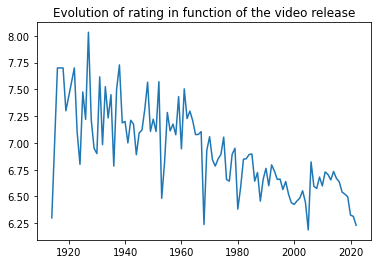

In [ ]:
tq = """Select year,  avg(score) From cinema_review
        Group by year
        Order by year
        """
val = run_query(tq)
x = []
y = []
for tup in val[1]:
  x.append(tup[0])
  y.append(tup[1])
plt.plot(x,y)
plt.title("Evolution of rating in function of the video release")

Newer movie/TvShow seems to have worst rating.
It looks like the overall trend is decreasing linearly.

Text(0.5, 1.0, "Evolution of number of opinion in function of the video year's release")

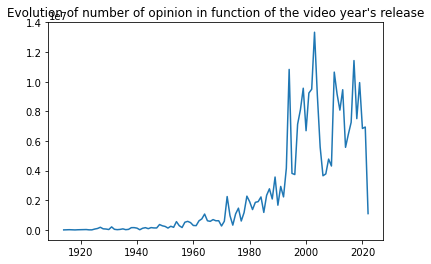

In [ ]:
tq = """Select year, sum(num_votes) From cinema_review
        Group by year
        Order by year
        """
val = run_query(tq)
x = []
y = []
for tup in val[1]:
  x.append(tup[0])
  y.append(tup[1])
plt.plot(x,y)
plt.title("Evolution of number of opinion in function of the video year's release")

The Sum of votes of movies/Tv show with the same release data seemed to grow exponantial before to sharply decrease in more recent years.

Text(0.5, 1.0, "Evolution of drama score genre in function of the video year's release")

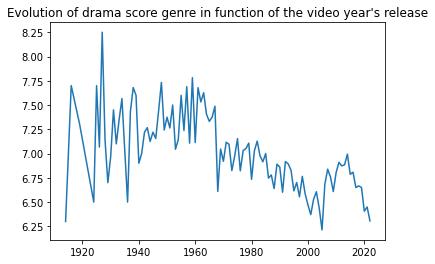

In [ ]:
tq = """Select year , avg(score), genres.genres From cinema_review
        right Join genres On cinema_review.video_id = genres.video_id
        Group by year, genres.genres 
        having genres.genres = 'drama'
        Order by year
        """
val = run_query(tq)
x = []
y = []
for tup in val[1]:
  x.append(tup[0])
  y.append(tup[1])
plt.plot(x,y)
plt.title("Evolution of drama score genre in function of the video year's release")

The most rated genre, Drama, has seen its populary decrease over the years.
It regain a bit of popularity in the early 2000's before to start decreasing again.

In [ ]:
tq = """Select sum(num_votes), genres.genres, actors.actors From cinema_review
        right Join genres On cinema_review.video_id = genres.video_id
        right Join actors On cinema_review.video_id = actors.video_id
        Group by genres.genres, actors.actors
        having actors.actors = 'Leonardo DiCaprio'
        order by sum(num_votes) desc
        """
val = run_query(tq)
val

(['sum', 'genres', 'actors'],
 [(5333036, 'drama', 'Leonardo DiCaprio'),
  (3349470, 'thriller', 'Leonardo DiCaprio'),
  (2766735, 'scifi', 'Leonardo DiCaprio'),
  (2582577, 'action', 'Leonardo DiCaprio'),
  (2269126, 'music', 'Leonardo DiCaprio'),
  (1562061, 'western', 'Leonardo DiCaprio'),
  (1426208, 'romance', 'Leonardo DiCaprio'),
  (1278508, 'biography', 'Leonardo DiCaprio'),
  (1263352, 'crime', 'Leonardo DiCaprio'),
  (498447, 'comedy', 'Leonardo DiCaprio'),
  (230035, 'adventure', 'Leonardo DiCaprio'),
  (865, 'documentary', 'Leonardo DiCaprio'),
  (59, 'short', 'Leonardo DiCaprio')])

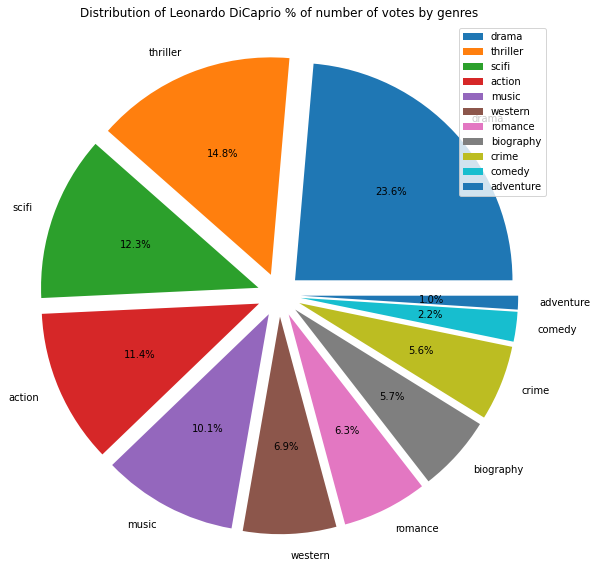

In [ ]:
val = run_query(tq)
sum_list = []
genres_list = []
for tup in val[1]:
  sum_list.append(tup[0])
  genres_list.append(tup[1])

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
y = np.array(sum_list)
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1,) 
plt.pie(y[:-2], labels = genres_list[:-2] ,autopct='%1.1f%%', explode = explode)
plt.legend()
plt.title('Distribution of Leonardo DiCaprio % of number of votes by genres')
plt.show() 